In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from platform import python_version
python_version()

'3.8.11'

In [6]:
import sdv
print(sdv.version.public)

1.12.1


In [7]:
from ctgan import CTGAN

# Первый набор

In [8]:
data_df = pd.read_csv(r'german_credit_data_target.csv', index_col=0)


In [9]:
data_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
data_df.shape

(1000, 10)

In [11]:
data_df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [12]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [13]:
metadata.detect_from_dataframe(data_df)

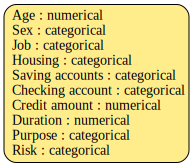

In [14]:
metadata.visualize(
    show_table_details='full',
    output_filepath='my_metadata.png'
)

In [15]:
metadata.validate()

In [16]:
from sdv.single_table import GaussianCopulaSynthesizer

# Step 1: Create the synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(data_df)

# Step 3: Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=data_df.shape[0]*100)

C:\Users\darya\anaconda3\lib\site-packages\sdv\single_table\base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [17]:
synthetic_data.shape

(100000, 10)

In [18]:
synthetic_data[:5]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,37,male,1,own,little,NaN,1652,9,car,good
1,63,male,3,own,NaN,NaN,2934,20,furniture/equipment,good
2,27,male,2,own,moderate,moderate,2009,34,business,good
3,45,female,1,own,moderate,NaN,5386,37,car,good
4,25,male,2,free,little,little,953,12,radio/TV,bad


In [19]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

In [20]:
# 1. perform basic validity checks
diagnostic = run_diagnostic(data_df, synthetic_data, metadata)


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 10/10 [00:00<00:00, 82.01it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 125.06it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [21]:
# 2. measure the statistical similarity
quality_report = evaluate_quality(data_df, synthetic_data, metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 34.86it/s]|
Column Shapes Score: 97.68%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:06<00:00,  6.98it/s]|
Column Pair Trends Score: 90.81%

Overall Score (Average): 94.25%



In [22]:
# 3. plot the data
fig = get_column_plot(
    real_data=data_df,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name='Age'
)

fig.show()

In [23]:
quality_report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,Age,KSComplement,0.976380
1,Sex,TVComplement,0.989700
2,Job,TVComplement,0.991570
3,Housing,TVComplement,0.997350
4,Saving accounts,TVComplement,0.992430
5,Checking account,TVComplement,0.990542
6,Credit amount,KSComplement,0.935960
7,Duration,KSComplement,0.904330
8,Purpose,TVComplement,0.995470
9,Risk,TVComplement,0.994150


In [35]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=data_df,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_names=['Age', 'Sex'],
    )

fig.show()

In [ ]:
for col in data_df.columns:
    fig = get_column_plot(real_data=data_df, synthetic_data=synthetic_data, metadata=metadata, column_name=col)
    fig.show()

In [26]:
from sdv.single_table import TVAESynthesizer

synthesizer_tvae = TVAESynthesizer(metadata)
synthesizer_tvae.fit(data_df)

synthetic_data_tvae = synthesizer_tvae.sample(data_df.shape[0]*100)

In [27]:
# 2. measure the statistical similarity
evaluate_quality(data_df, synthetic_data_tvae, metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 41.86it/s]|
Column Shapes Score: 80.28%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:05<00:00,  7.51it/s]|
Column Pair Trends Score: 71.28%

Overall Score (Average): 75.78%



# Второй набор

In [28]:
scheme= pd.read_csv(r'loans_full_schema.csv')

In [29]:
scheme.shape

(10000, 55)

In [30]:
scheme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [31]:
scheme.emp_title.value_counts()

manager                     218
owner                       204
teacher                     201
driver                      123
sales                        97
                           ... 
corporate tax director        1
captain-fire department       1
intervention specialist       1
coffee roaster                1
toolmaker                     1
Name: emp_title, Length: 4741, dtype: int64

In [32]:
metadata2 = SingleTableMetadata()
metadata2.detect_from_dataframe(scheme)

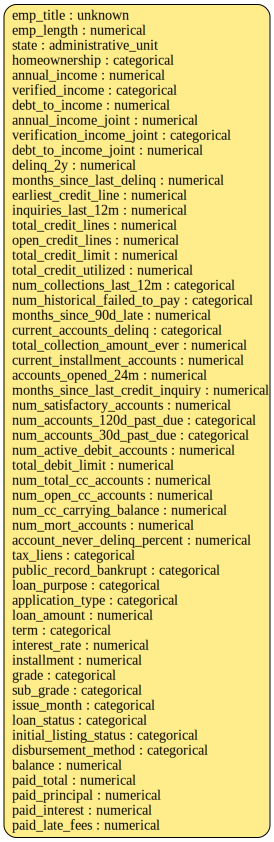

In [33]:
metadata2.visualize(
    show_table_details='full',
    output_filepath='my_metadata.png'
)

In [34]:
metadata2.update_column(column_name='emp_title', sdtype='categorical')

In [16]:
from sdv.single_table import GaussianCopulaSynthesizer
synthesizer2 = GaussianCopulaSynthesizer(metadata2)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [17]:
# Step 2: Train the synthesizer
synthesizer2.fit(scheme)

# Step 3: Generate synthetic data
synthetic_data2 = synthesizer2.sample(num_rows=scheme.shape[0]*100)

In [20]:
# 2. measure the statistical similarity
evaluate_quality(scheme, synthetic_data2, metadata2)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 55/55 [00:09<00:00,  5.68it/s]|
Column Shapes Score: 88.28%

(2/2) Evaluating Column Pair Trends: |██████████| 1485/1485 [14:41<00:00,  1.68it/s]|
Column Pair Trends Score: 90.55%

Overall Score (Average): 89.42%



In [23]:
for col in scheme.loc[:, scheme.columns!='state'].columns:
    fig1 = get_column_plot(real_data=scheme.loc[:, scheme.columns!='state'],
                        synthetic_data=synthetic_data2.loc[:, scheme.columns!='state'],
                        metadata=metadata2, column_name=col) 
    fig1.show()

Output hidden; open in https://colab.research.google.com to view.

# Итоги



---


Первый набор

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 10/10 [00:00<00:00, 33.69it/s]|
Column Shapes Score: 97.68%

(2/2) Evaluating Column Pair Trends: |██████████| 45/45 [00:06<00:00,  6.52it/s]|
Column Pair Trends Score: 90.81%

Overall Score (Average): 94.25%



---


Второй набор

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 55/55 [00:09<00:00,  5.68it/s]|
Column Shapes Score: 88.28%

(2/2) Evaluating Column Pair Trends: |██████████| 1485/1485 [14:41<00:00,  1.68it/s]|
Column Pair Trends Score: 90.55%

Overall Score (Average): 89.42%